In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pingouin
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Odwrócenie skali
def flip_scale(df, nazwa):
    df[nazwa] = 6 - df[nazwa]

#Zmiana wyników na liczbowe dla CET
def zamień_dane(df):
    mapping = {
        "Nigdy": 0,
        "Rzadko": 1,
        "Czasami": 2,
        "Często": 3,
        "Prawie zawsze": 4,
        "Zawsze": 5
    }
    
    return df.replace(mapping)

In [3]:
df = pd.read_excel("CET.xlsx")
df

,Unnamed: 0,ID,Godzina rozpoczęcia,Godzina ukończenia,Adres e-mail,Nazwa,Czas ostatniej modyfikacji,Nr.1,Nr.2,Nr.3,...,Nr.2b,Nr.3b,Nr.4b,Nr.5b,Nr.6b,Nr.7b,Nr.8b,Nr.9b,Nr.10b,Nr.11b
0,0,5,2024-05-06 18:56:37,2024-05-06 18:57:15,anonymous,NaN,NaN,Prawie zawsze,Czasami,Prawie zawsze,...,Czasami,Często,Czasami,Często,Nigdy,Nigdy,Zawsze,Rzadko,Czasami,Często
1,2,5,2024-05-06 18:56:37,2024-05-06 18:57:15,anonymous,NaN,NaN,Czasami,Czasami,Prawie zawsze,...,Czasami,Często,Czasami,Często,Nigdy,Nigdy,Zawsze,Rzadko,Czasami,Często
2,3,5,2024-05-06 18:56:37,2024-05-06 18:57:15,anonymous,NaN,NaN,Prawie zawsze,Czasami,Często,...,Czasami,Zawsze,Zawsze,Często,Nigdy,Nigdy,Nigdy,Zawsze,Czasami,Często
3,4,5,2024-05-06 18:56:37,2024-05-06 18:57:15,anonymous,NaN,NaN,Prawie zawsze,Czasami,Nigdy,...,Nigdy,Często,Nigdy,Często,Nigdy,Zawsze,Zawsze,Rzadko,Czasami,Często


In [4]:
CET = zamień_dane(df)
CET


,Unnamed: 0,ID,Godzina rozpoczęcia,Godzina ukończenia,Adres e-mail,Nazwa,Czas ostatniej modyfikacji,Nr.1,Nr.2,Nr.3,...,Nr.2b,Nr.3b,Nr.4b,Nr.5b,Nr.6b,Nr.7b,Nr.8b,Nr.9b,Nr.10b,Nr.11b
0,0,5,2024-05-06 18:56:37,2024-05-06 18:57:15,anonymous,NaN,NaN,4,2,4,...,2,3,2,3,0,0,5,1,2,3
1,2,5,2024-05-06 18:56:37,2024-05-06 18:57:15,anonymous,NaN,NaN,2,2,4,...,2,3,2,3,0,0,5,1,2,3
2,3,5,2024-05-06 18:56:37,2024-05-06 18:57:15,anonymous,NaN,NaN,4,2,3,...,2,5,5,3,0,0,0,5,2,3
3,4,5,2024-05-06 18:56:37,2024-05-06 18:57:15,anonymous,NaN,NaN,4,2,0,...,0,3,0,3,0,5,5,1,2,3


In [7]:
#Alfa Chronbacha dla całego arkusza
dane = CET[["Nr.1", "Nr.2", "Nr.3", "Nr.4", "Nr.5", "Nr.6", "Nr.7", "Nr.8", "Nr.9", "Nr.10", "Nr.11", "Nr.12", "Nr.13", "Nr.14", "Nr.15", "Nr.16", "Nr.17", "Nr.18",
           "Nr.19", "Nr.20", "Nr.21", "Nr.22", "Nr.23", "Nr.24"]]
pingouin.cronbach_alpha(data=dane)

(0.608930036329544, array([-0.295,  0.972]))

<Axes: >

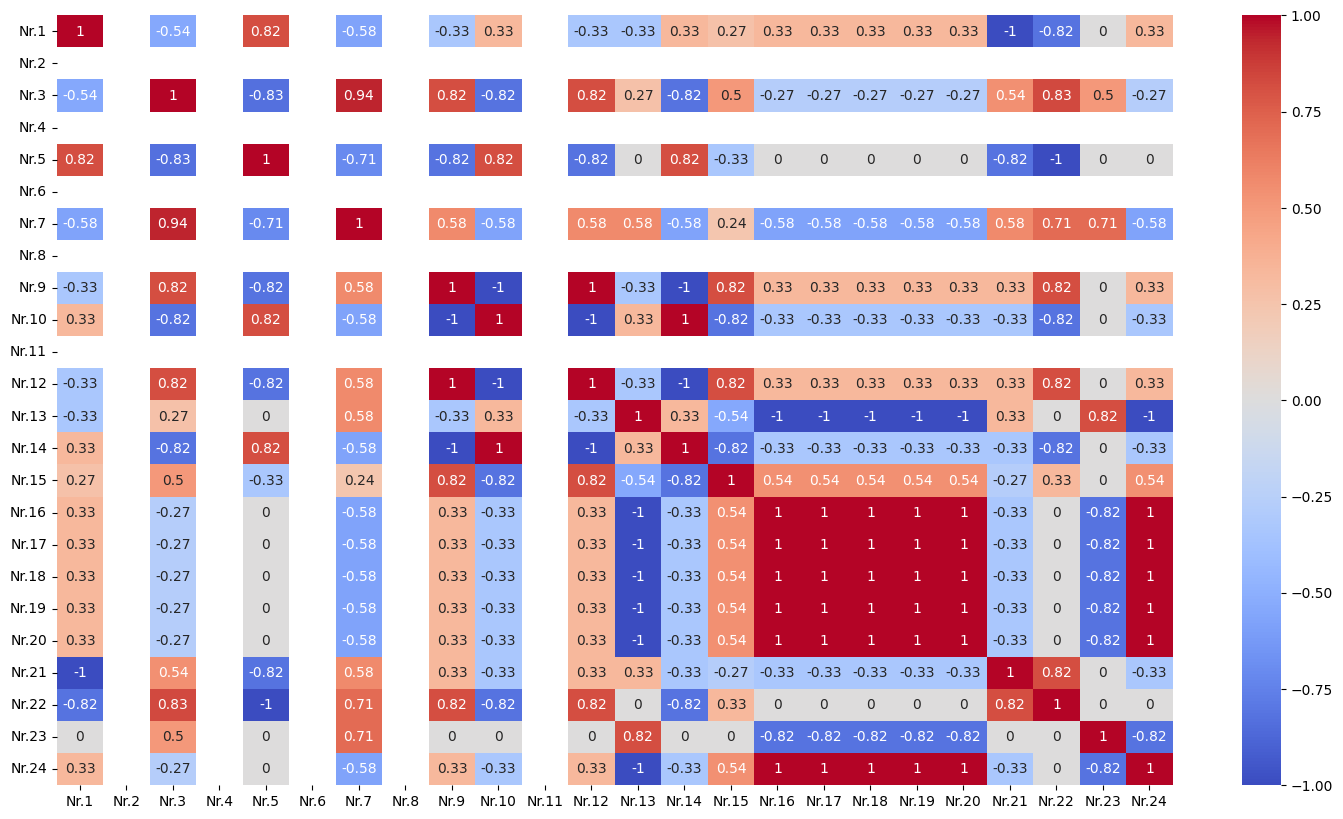

In [19]:
#Heatmap z korelacją spearmana, annot=True/False
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(dane.corr(method='spearman'), annot=True, cmap="coolwarm")